In [76]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np

#read csv file into dataframe
h2o_csv = pd.read_csv("Data\cleaned_h20_use.csv")

In [75]:
# convert cubic meters to gallons
conversion = 264.172

# perform equation to conver
h2o_csv['h2o_gal'] = h2o_csv['h20_value'] * conversion


h2o_csv

,country,continent,h20_variable,year,h20_unit,h20_powercode_code,h20_powercode,h20_value,h20_flags,h2o_gal
0,Australia,Oceania,Public water supply - non-freshwater,2001,Cubic metres,6,Millions,0.253,NaN,66.835516
1,Australia,Oceania,Public water supply - non-freshwater,2005,Cubic metres,6,Millions,0.231,NaN,61.023732
2,Australia,Oceania,Public water supply - non-freshwater,2009,Cubic metres,6,Millions,33.000,NaN,8717.676000
3,Australia,Oceania,Public water supply - non-freshwater,2010,Cubic metres,6,Millions,77.000,NaN,20341.244000
4,Australia,Oceania,Public water supply - non-freshwater,2011,Cubic metres,6,Millions,121.000,NaN,31964.812000
...,...,...,...,...,...,...,...,...,...,...
16544,Chile,South America,Total desalinated water. Non-freshwater,2017,Cubic metres,6,Millions,28.310,NaN,7478.709320
16545,Chile,South America,Total desalinated water. Non-freshwater,2018,Cubic metres,6,Millions,21.230,NaN,5608.371560
16546,Chile,South America,Total desalinated water. Non-freshwater,2019,Cubic metres,6,Millions,26.340,NaN,6958.290480
16547,Chile,South America,Total desalinated water. Non-freshwater,2020,Cubic metres,6,Millions,25.280,NaN,6678.268160


In [3]:
df = h2o_csv

#define time intervals in 10 year blocks
tenyears = [(1992, 2001), (2002, 2011), (2012, 2021)]

# create a function to calculate average over intervals
def calculate_10yr_avg(group):
    avg_gal = group['h2o_gal'].sum()
    return avg_gal

#create an empty dataframe to store results
results_list = []

#group data by continent and year interval and calculate the total gallons
for continent in df['continent'].unique():
    for interval in tenyears:
        start_year, end_year = interval
        mask = (df['continent'] == continent) & (df['year'] >= start_year) & (df['year'] <= end_year)
        group = df[mask]
        avg_gal = calculate_10yr_avg(group)
        results_list.append({'continent': continent, 'tenyears': f'{start_year}-{end_year}', 'avg_gal': avg_gal},)
        
#create dataframe after loop        
results = pd.DataFrame(results_list)
results = results.dropna()
#print
results


,continent,tenyears,avg_gal
0,Oceania,1992-2001,6.952101e+05
1,Oceania,2002-2011,2.399335e+07
2,Oceania,2012-2021,8.329926e+07
3,Europe,1992-2001,2.614045e+08
4,Europe,2002-2011,1.838908e+09
5,Europe,2012-2021,3.198710e+09
6,North America,1992-2001,1.207785e+08
7,North America,2002-2011,3.254879e+08
8,North America,2012-2021,2.774611e+08
12,Asia,1992-2001,3.423796e+08


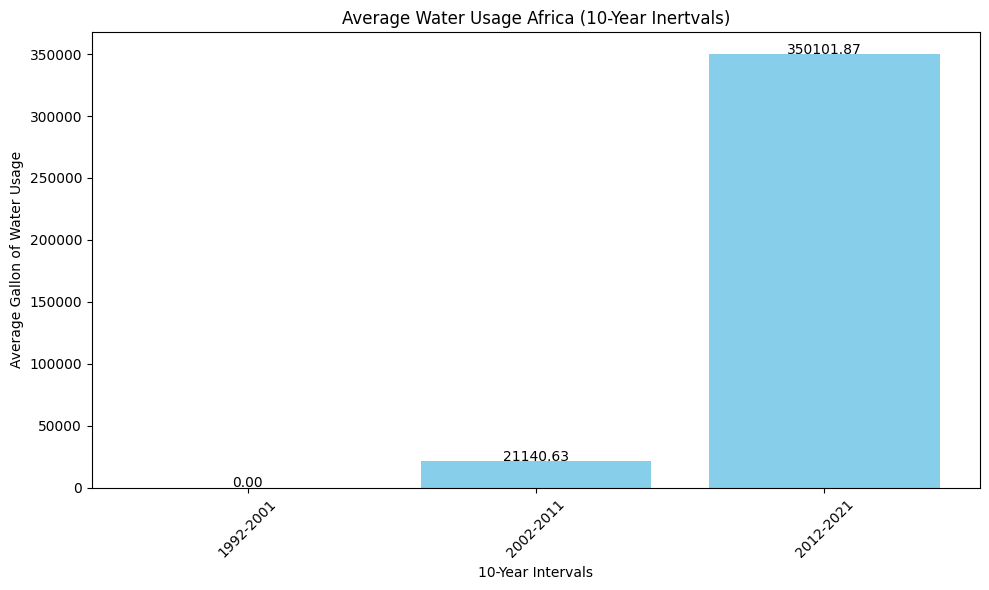

In [4]:
#filter data for africa
Africa = results[results['continent'] == 'Africa']

#bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(Africa['tenyears'], Africa['avg_gal'], color='skyblue')
#labels and title
plt.xlabel('10-Year Intervals')
plt.ylabel('Average Gallon of Water Usage')
plt.title('Average Water Usage Africa (10-Year Inertvals)')
#rotation
plt.xticks(rotation=45)

# include average gallon on top of each bar
for bar, avg_gal in zip(bars, Africa['avg_gal']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{avg_gal:.2f}', ha='center')
#display
plt.tight_layout()
plt.show()

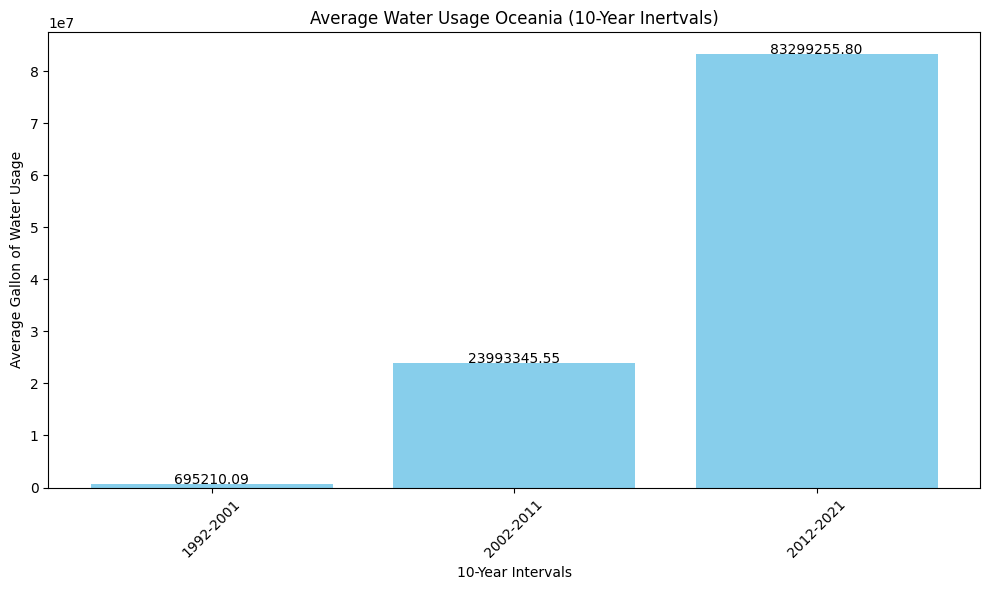

In [5]:
#filter data for africa
Oceania = results[results['continent'] == 'Oceania']

#bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(Oceania['tenyears'], Oceania['avg_gal'], color='skyblue')
#labels and title
plt.xlabel('10-Year Intervals')
plt.ylabel('Average Gallon of Water Usage')
plt.title('Average Water Usage Oceania (10-Year Inertvals)')
#rotation
plt.xticks(rotation=45)

# include average gallon on top of each bar
for bar, avg_gal in zip(bars, Oceania['avg_gal']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{avg_gal:.2f}', ha='center')
#display
plt.tight_layout()
plt.show()

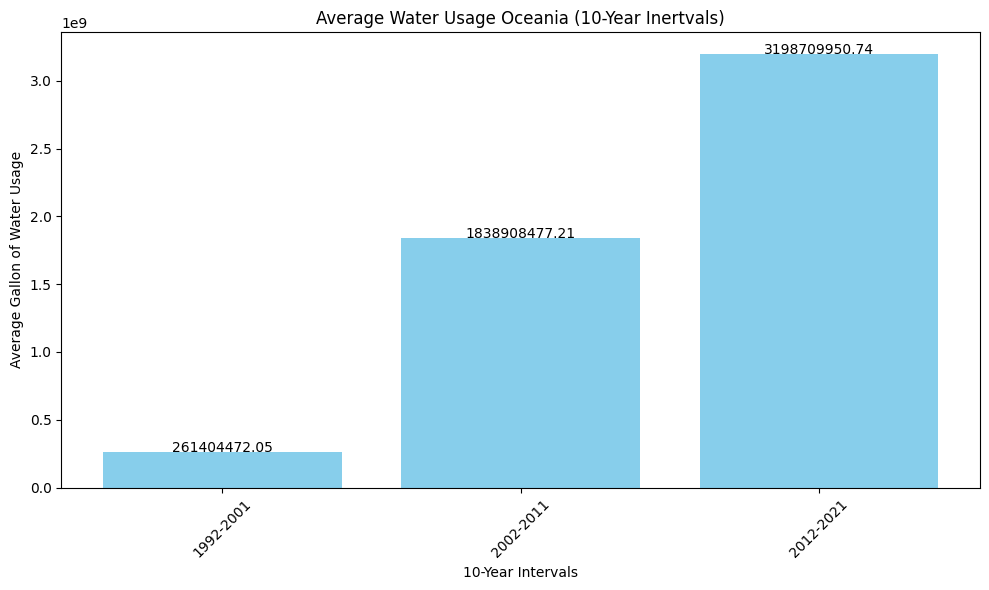

In [6]:
#filter data for africa
Europe = results[results['continent'] == 'Europe']

#bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(Europe['tenyears'], Europe['avg_gal'], color='skyblue')
#labels and title
plt.xlabel('10-Year Intervals')
plt.ylabel('Average Gallon of Water Usage')
plt.title('Average Water Usage Oceania (10-Year Inertvals)')
#rotation
plt.xticks(rotation=45)

# include average gallon on top of each bar
for bar, avg_gal in zip(bars, Europe['avg_gal']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{avg_gal:.2f}', ha='center')
#display
plt.tight_layout()
plt.show()

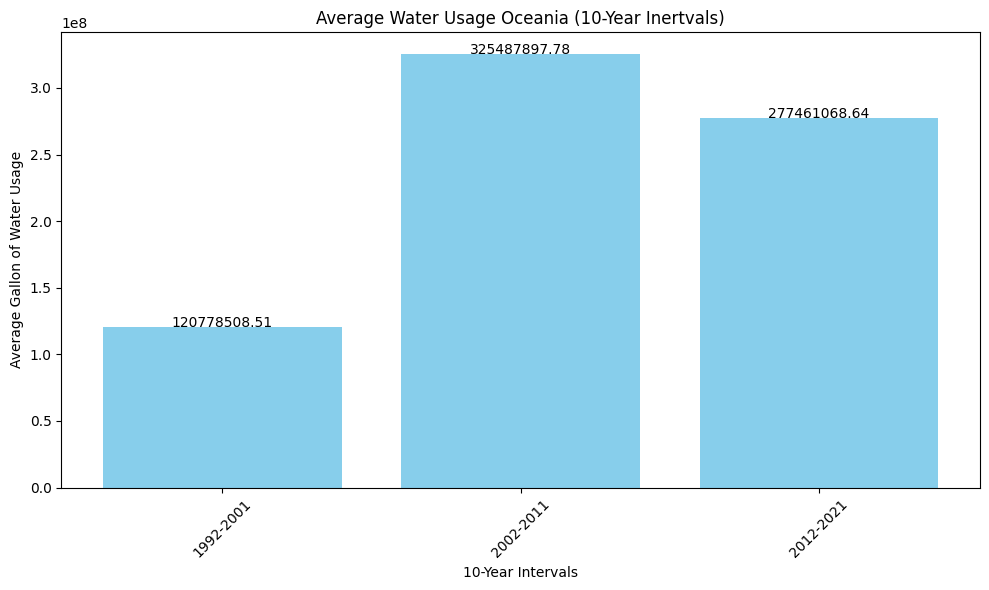

In [7]:
#filter data for africa
North_America = results[results['continent'] == 'North America']

#bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(Europe['tenyears'], North_America['avg_gal'], color='skyblue')
#labels and title
plt.xlabel('10-Year Intervals')
plt.ylabel('Average Gallon of Water Usage')
plt.title('Average Water Usage Oceania (10-Year Inertvals)')
#rotation
plt.xticks(rotation=45)

# include average gallon on top of each bar
for bar, avg_gal in zip(bars, North_America['avg_gal']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{avg_gal:.2f}', ha='center')
#display
plt.tight_layout()
plt.show()

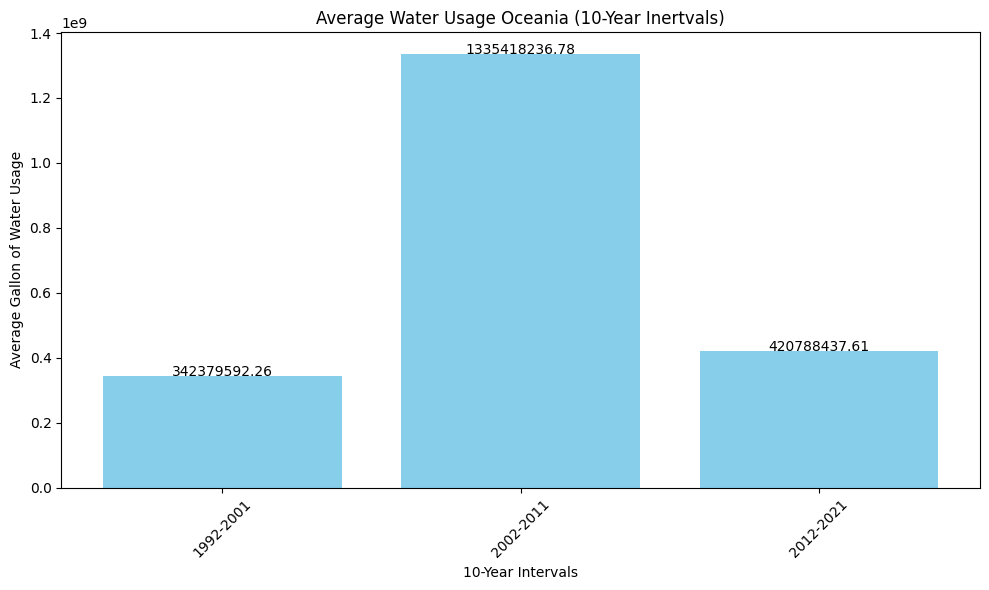

In [8]:
#filter data for africa
Asia = results[results['continent'] == 'Asia']

#bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(Europe['tenyears'], Asia['avg_gal'], color='skyblue')
#labels and title
plt.xlabel('10-Year Intervals')
plt.ylabel('Average Gallon of Water Usage')
plt.title('Average Water Usage Oceania (10-Year Inertvals)')
#rotation
plt.xticks(rotation=45)

# include average gallon on top of each bar
for bar, avg_gal in zip(bars, Asia['avg_gal']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{avg_gal:.2f}', ha='center')
#display
plt.tight_layout()
plt.show()

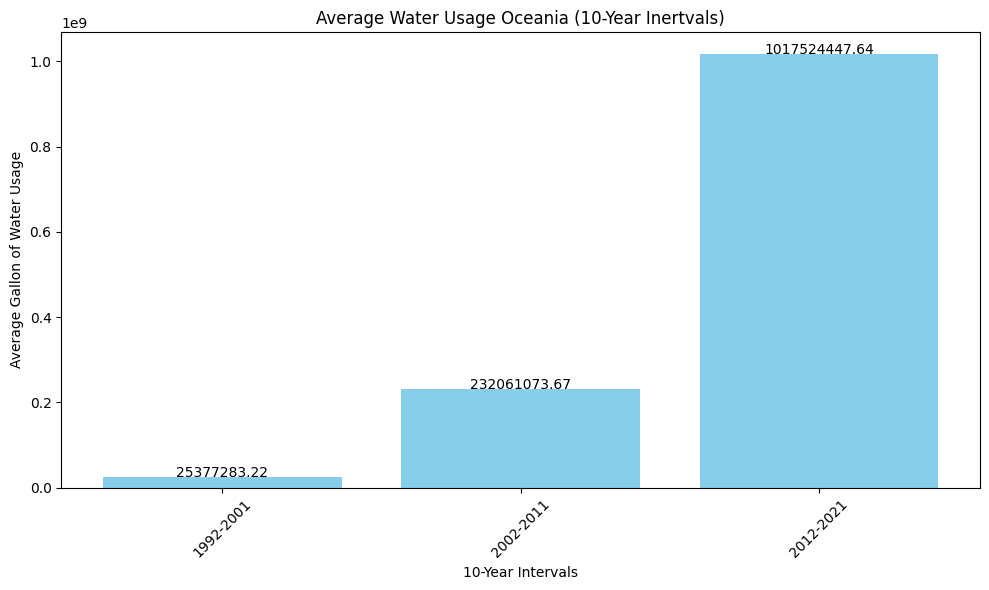

In [9]:
#filter data for africa
South_America = results[results['continent'] == 'South America']

#bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(Europe['tenyears'], South_America['avg_gal'], color='skyblue')
#labels and title
plt.xlabel('10-Year Intervals')
plt.ylabel('Average Gallon of Water Usage')
plt.title('Average Water Usage Oceania (10-Year Inertvals)')
#rotation
plt.xticks(rotation=45)

# include average gallon on top of each bar
for bar, avg_gal in zip(bars, South_America['avg_gal']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{avg_gal:.2f}', ha='center')
#display
plt.tight_layout()
plt.show()

In [58]:
# convert cubic meters to gallons
conversion = 264.172

# perform equation to conver
h2o_csv['h2o_gal'] = h2o_csv['h20_value'] * conversion

#break down of each continent removing zeros
africa_df = h2o_csv[h2o_csv['continent'] == 'Africa']
africa_df = africa_df.sort_values(by='year')
africa_df = africa_df[africa_df['h2o_gal'] != 0]

africa_df


,country,continent,h20_variable,year,h20_unit,h20_powercode_code,h20_powercode,h20_value,h20_flags,h2o_gal
16405,South Africa,Africa,Total gross abstraction. Desalinated water,2005,Cubic metres,6,Millions,0.237,NaN,62.608764
16406,South Africa,Africa,Total gross abstraction. Desalinated water,2006,Cubic metres,6,Millions,0.237,NaN,62.608764
16407,South Africa,Africa,Total gross abstraction. Desalinated water,2007,Cubic metres,6,Millions,11.187,NaN,2955.292164
16408,South Africa,Africa,Total gross abstraction. Desalinated water,2008,Cubic metres,6,Millions,11.187,NaN,2955.292164
16409,South Africa,Africa,Total gross abstraction. Desalinated water,2009,Cubic metres,6,Millions,11.917,NaN,3148.137724
16410,South Africa,Africa,Total gross abstraction. Desalinated water,2010,Cubic metres,6,Millions,19.601,NaN,5178.035372
16411,South Africa,Africa,Total gross abstraction. Desalinated water,2011,Cubic metres,6,Millions,25.660,NaN,6778.653520
16412,South Africa,Africa,Total gross abstraction. Desalinated water,2012,Cubic metres,6,Millions,26.536,NaN,7010.068192
16413,South Africa,Africa,Total gross abstraction. Desalinated water,2013,Cubic metres,6,Millions,33.836,NaN,8938.523792
16414,South Africa,Africa,Total gross abstraction. Desalinated water,2014,Cubic metres,6,Millions,34.456,NaN,9102.310432


C:\Users\zombi\AppData\Local\Temp\ipykernel_21828\621712393.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  africa = africa_df[h2o_csv['continent'] == 'Africa']


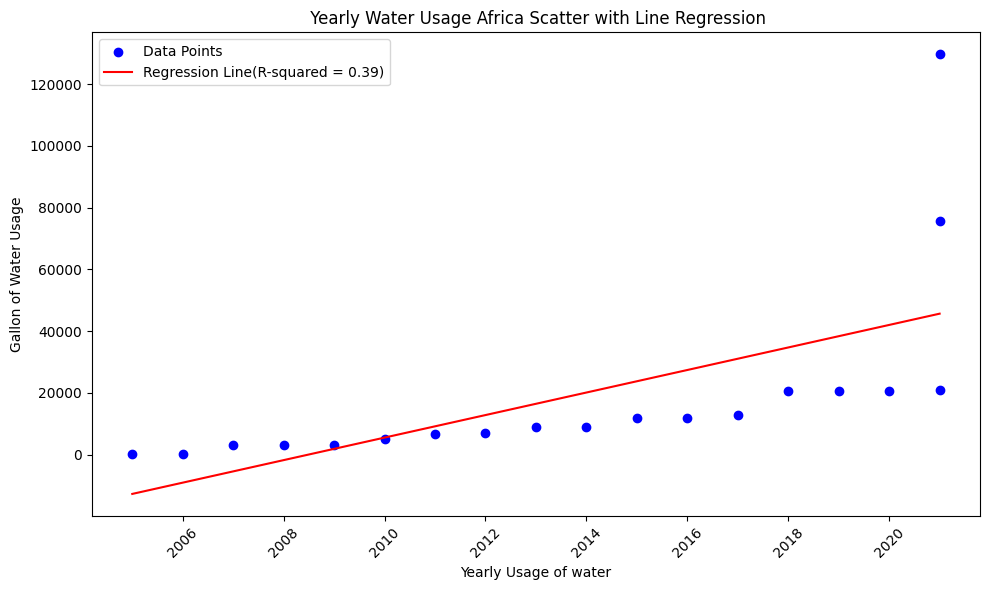

In [53]:
#filter data for africa excluding 1992-2001 due to no data
africa = africa_df[h2o_csv['continent'] == 'Africa']

#convert data frame columns to numpy arrays
x = np.array(africa['year'])
y = np.array(africa['h2o_gal'])

#create scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')

# calculate linerar regression params
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#create the regression line
regression_line = slope * x + intercept

#plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line(R-squared = {r_value**2:,.2f})')

#labels and title
plt.xlabel('Yearly Usage of water')
plt.ylabel('Gallon of Water Usage')
plt.title(' Yearly Water Usage Africa Scatter with Line Regression')

#legend
plt.legend()

#display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# convert cubic meters to gallons
conversion = 264.172

# perform equation to conver
h2o_csv['h2o_gal'] = h2o_csv['h20_value'] * conversion

Oceania_df = h2o_csv[h2o_csv['continent'] == 'Oceania']
Oceania_df = Oceania_df.sort_values(by='year')
Oceania_df = Oceania_df[Oceania_df['h2o_gal'] != 0]

Oceania_df

,country,continent,h20_variable,year,h20_unit,h20_powercode_code,h20_powercode,h20_value,h20_flags,h2o_gal
0,Australia,Oceania,Public water supply - non-freshwater,2001,Cubic metres,6,Millions,0.253,NaN,6.683552e+01
35,Australia,Oceania,Total losses during transport,2001,Cubic metres,6,Millions,2117.010,NaN,5.592548e+05
11,Australia,Oceania,Total abstractions of reused water,2001,Cubic metres,6,Millions,506.920,NaN,1.339141e+05
23,Australia,Oceania,Abstractions for manufacturing. Reused water,2001,Cubic metres,6,Millions,7.474,NaN,1.974422e+03
12,Australia,Oceania,Total abstractions of reused water,2005,Cubic metres,6,Millions,424.615,NaN,1.121714e+05
...,...,...,...,...,...,...,...,...,...,...
117,Australia,Oceania,Public water supply for households,2021,Cubic metres,6,Millions,1793.700,NaN,4.738453e+05
130,Australia,Oceania,Self- and other supply,2021,Cubic metres,6,Millions,12693.643,NaN,3.353305e+06
152,Australia,Oceania,Self- and other supply for electricity product...,2021,Cubic metres,6,Millions,304.743,NaN,8.050457e+04
52,Australia,Oceania,Public water supply,2021,Cubic metres,6,Millions,3557.135,NaN,9.396955e+05


C:\Users\zombi\AppData\Local\Temp\ipykernel_21828\264552530.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Oceania = Oceania_df[h2o_csv['continent'] == 'Oceania']


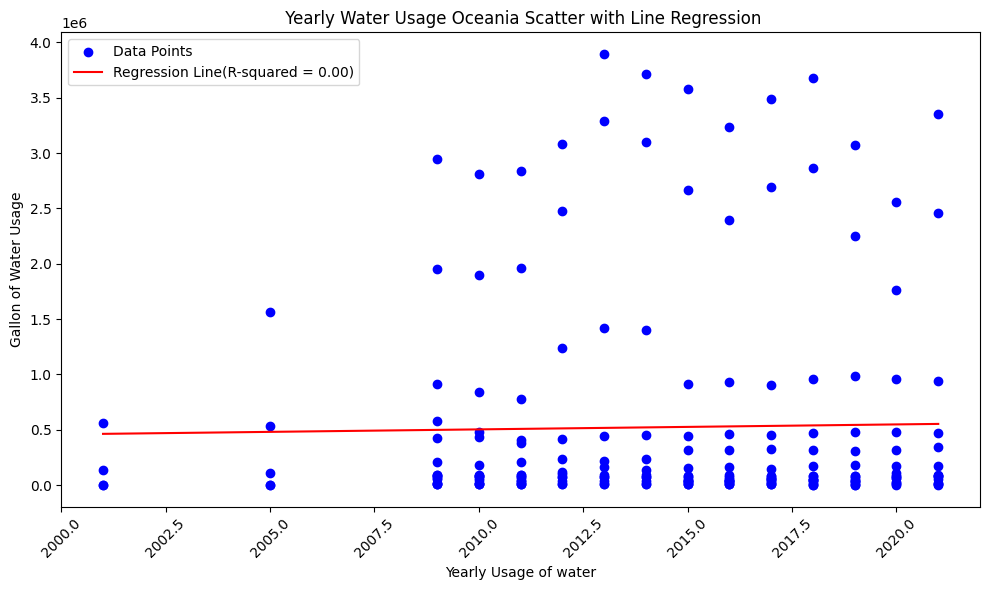

In [61]:
#filter data for Oceania
Oceania = Oceania_df[h2o_csv['continent'] == 'Oceania']

#convert data frame columns to numpy arrays
x = np.array(Oceania['year'])
y = np.array(Oceania['h2o_gal'])

#create scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')

# calculate linerar regression params
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#create the regression line
regression_line = slope * x + intercept

#plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line(R-squared = {r_value**2:,.2f})')

#labels and title
plt.xlabel('Yearly Usage of water')
plt.ylabel('Gallon of Water Usage')
plt.title(' Yearly Water Usage Oceania Scatter with Line Regression')

#legend
plt.legend()

#display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# convert cubic meters to gallons
conversion = 264.172

# perform equation to conver
h2o_csv['h2o_gal'] = h2o_csv['h20_value'] * conversion

Europe_df = h2o_csv[h2o_csv['continent'] == 'Europe']
Europe_df = Europe_df.sort_values(by='year')
Europe_df = Europe_df[Europe_df['h2o_gal'] != 0]

Europe_df

,country,continent,h20_variable,year,h20_unit,h20_powercode_code,h20_powercode,h20_value,h20_flags,h2o_gal
179,Austria,Europe,Public water supply,1992,Cubic metres,6,Millions,632.80,NaN,167168.04160
8207,Slovenia,Europe,Public water supply for industry and construction,1992,Cubic metres,6,Millions,66.00,NaN,17435.35200
8009,Slovenia,Europe,Public water supply for households,1992,Cubic metres,6,Millions,80.30,NaN,21213.01160
6773,Switzerland,Europe,Public water supply for industry and construction,1992,Cubic metres,6,Millions,229.00,NaN,60495.38800
6764,Switzerland,Europe,Public water supply for services,1992,Cubic metres,6,Millions,95.00,NaN,25096.34000
...,...,...,...,...,...,...,...,...,...,...
8192,Slovenia,Europe,Public water supply for other manufacturing in...,2021,Cubic metres,6,Millions,4.18,NaN,1104.23896
8206,Slovenia,Europe,Public water supply for services,2021,Cubic metres,6,Millions,21.90,NaN,5785.36680
1543,Czech Republic,Europe,Self- and other supply for electricity product...,2021,Cubic metres,6,Millions,264.50,NaN,69873.49400
8228,Slovenia,Europe,Public water supply for industry and construction,2021,Cubic metres,6,Millions,11.20,NaN,2958.72640


C:\Users\zombi\AppData\Local\Temp\ipykernel_21828\1193917146.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Europe = Europe_df[h2o_csv['continent'] == 'Europe']


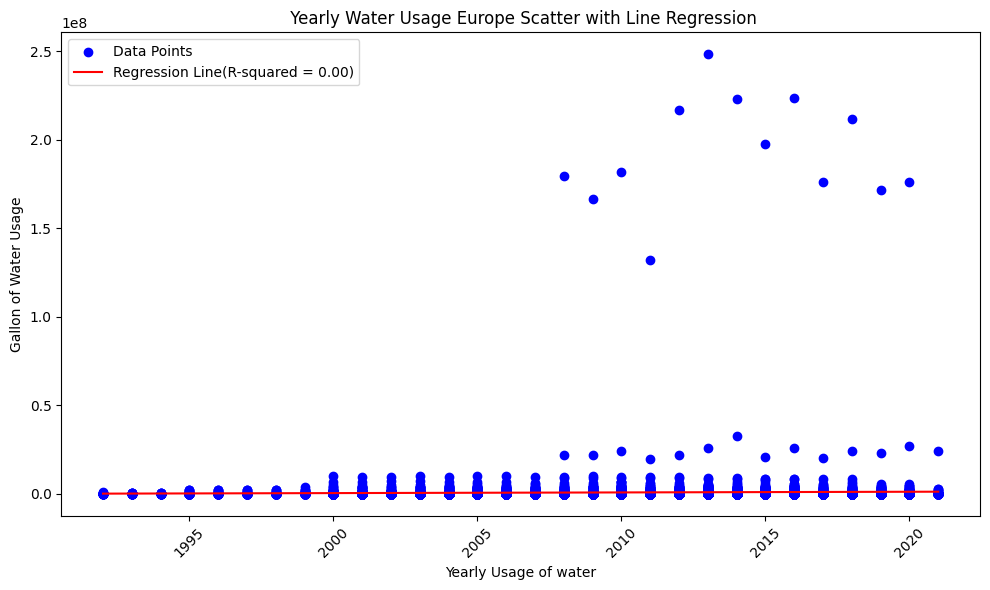

In [63]:
#filter data for Europe
Europe = Europe_df[h2o_csv['continent'] == 'Europe']

#convert data frame columns to numpy arrays
x = np.array(Europe['year'])
y = np.array(Europe['h2o_gal'])

#create scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')

# calculate linerar regression params
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#create the regression line
regression_line = slope * x + intercept

#plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line(R-squared = {r_value**2:,.2f})')

#labels and title
plt.xlabel('Yearly Usage of water')
plt.ylabel('Gallon of Water Usage')
plt.title(' Yearly Water Usage Europe Scatter with Line Regression')

#legend
plt.legend()

#display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
# convert cubic meters to gallons
conversion = 264.172

# perform equation to conver
h2o_csv['h2o_gal'] = h2o_csv['h20_value'] * conversion

North_America_df = h2o_csv[h2o_csv['continent'] == 'North America']
North_America_df = North_America_df.sort_values(by='year')
North_America_df = North_America_df[North_America_df['h2o_gal'] != 0]

North_America_df

,country,continent,h20_variable,year,h20_unit,h20_powercode_code,h20_powercode,h20_value,h20_flags,h2o_gal
1298,Canada,North America,Self- and other supply,1995,Cubic metres,6,Millions,39673.000,NaN,1.048050e+07
1302,Canada,North America,Self- and other supply for industrial activities,1995,Cubic metres,6,Millions,34918.000,NaN,9.224358e+06
1256,Canada,North America,Public water supply for industrial activities,1995,Cubic metres,6,Millions,1928.300,NaN,5.094029e+05
7273,United States,North America,Total gross abstraction non-freshwater,1995,Cubic metres,6,Millions,84009.015,NaN,2.219283e+07
1269,Canada,North America,Public water supply for total manufacturing,1995,Cubic metres,6,Millions,855.260,NaN,2.259357e+05
...,...,...,...,...,...,...,...,...,...,...
8496,Mexico,North America,Abstractions for irrigation. Reused water,2021,Cubic metres,6,Millions,2766.000,NaN,7.306998e+05
2944,Mexico,North America,Public water supply for households,2021,Cubic metres,6,Millions,37.000,NaN,9.774364e+03
8452,Mexico,North America,Total abstractions of reused water,2021,Cubic metres,6,Millions,3318.000,NaN,8.765227e+05
8518,Mexico,North America,Imported water,2021,Cubic metres,6,Millions,48381.000,NaN,1.278091e+07


C:\Users\zombi\AppData\Local\Temp\ipykernel_21828\1005391067.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  North_America = North_America_df[h2o_csv['continent'] == 'North America']


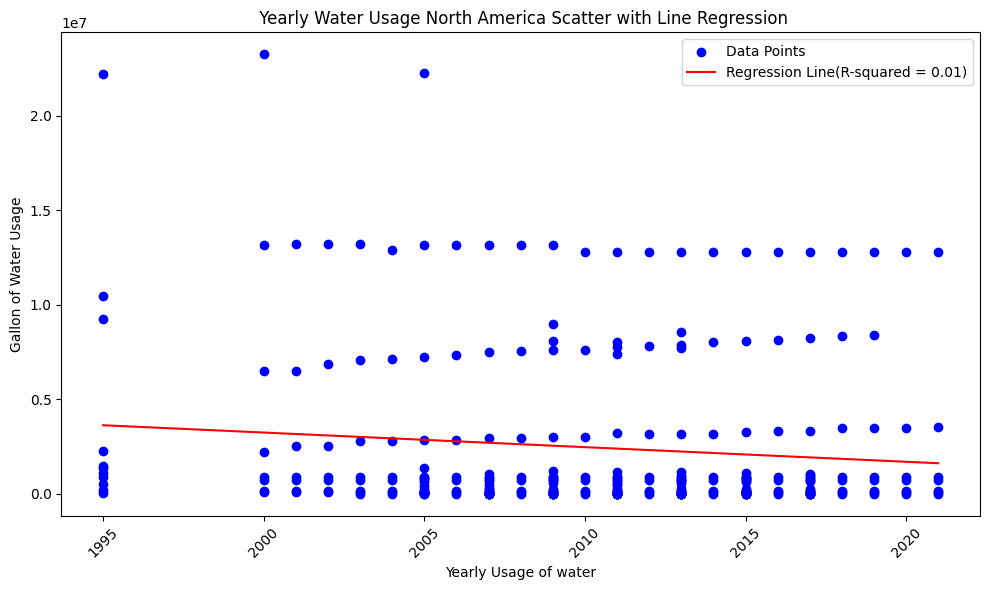

In [65]:
#filter data for Europe
North_America = North_America_df[h2o_csv['continent'] == 'North America']

#convert data frame columns to numpy arrays
x = np.array(North_America['year'])
y = np.array(North_America['h2o_gal'])

#create scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')

# calculate linerar regression params
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#create the regression line
regression_line = slope * x + intercept

#plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line(R-squared = {r_value**2:,.2f})')

#labels and title
plt.xlabel('Yearly Usage of water')
plt.ylabel('Gallon of Water Usage')
plt.title(' Yearly Water Usage North America Scatter with Line Regression')

#legend
plt.legend()

#display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
# convert cubic meters to gallons
conversion = 264.172

# perform equation to conver
h2o_csv['h2o_gal'] = h2o_csv['h20_value'] * conversion

Asia_df = h2o_csv[h2o_csv['continent'] == 'Asia']
Asia_df = Asia_df.sort_values(by='year')
Asia_df = Asia_df[Asia_df['h2o_gal'] != 0]

Asia_df

,country,continent,h20_variable,year,h20_unit,h20_powercode_code,h20_powercode,h20_value,h20_flags,h2o_gal
4711,Poland,Asia,Public water supply for industry and construction,1992,Cubic metres,6,Millions,272.900,NaN,7.209254e+04
7248,United Kingdom,Asia,Public water supply,1992,Cubic metres,6,Millions,7165.000,NaN,1.892792e+06
4492,Poland,Asia,Public water supply for households,1992,Cubic metres,6,Millions,1921.900,NaN,5.077122e+05
4348,Poland,Asia,Public water supply,1992,Cubic metres,6,Millions,2196.800,NaN,5.803330e+05
4712,Poland,Asia,Public water supply for industry and construction,1993,Cubic metres,6,Millions,243.500,NaN,6.432588e+04
...,...,...,...,...,...,...,...,...,...,...
4347,Poland,Asia,Total losses during transport,2021,Cubic metres,6,Millions,330.310,NaN,8.725865e+04
7548,Estonia,Asia,Self- and other supply,2021,Cubic metres,6,Millions,755.396,NaN,1.995545e+05
9473,Türkiye,Asia,Abstractions for aquaculture. Non-freshwater,2021,Cubic metres,6,Millions,505.000,NaN,1.334069e+05
13127,Estonia,Asia,Self- and other supply - Other manufacturing,2021,Cubic metres,6,Millions,1.785,NaN,4.715470e+02


C:\Users\zombi\AppData\Local\Temp\ipykernel_21828\902405099.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Asia = Asia_df[h2o_csv['continent'] == 'Asia']


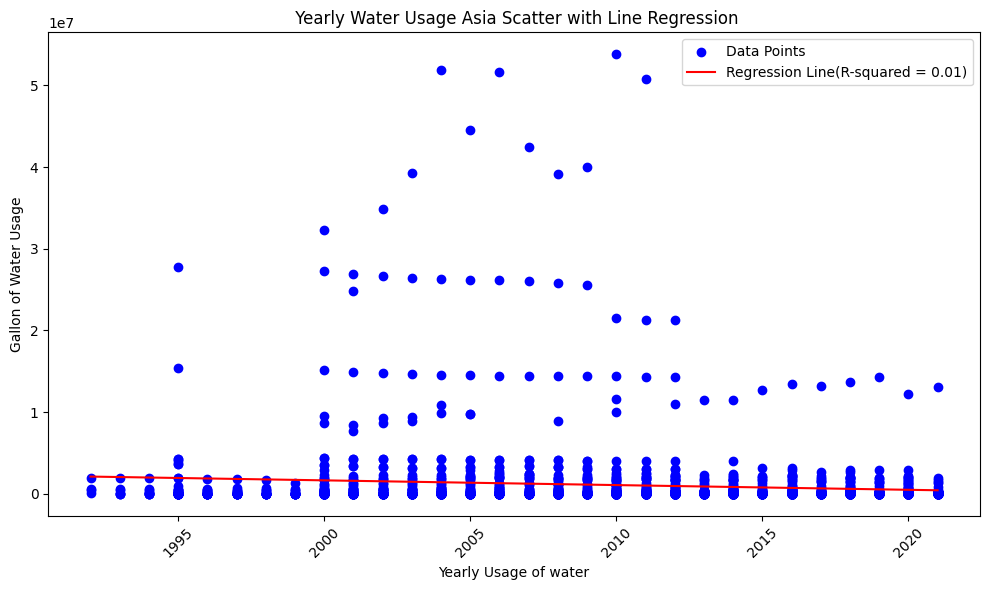

In [68]:
#filter data for Europe
Asia = Asia_df[h2o_csv['continent'] == 'Asia']

#convert data frame columns to numpy arrays
x = np.array(Asia['year'])
y = np.array(Asia['h2o_gal'])

#create scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')

# calculate linerar regression params
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#create the regression line
regression_line = slope * x + intercept

#plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line(R-squared = {r_value**2:,.2f})')

#labels and title
plt.xlabel('Yearly Usage of water')
plt.ylabel('Gallon of Water Usage')
plt.title(' Yearly Water Usage Asia Scatter with Line Regression')

#legend
plt.legend()

#display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
# convert cubic meters to gallons
conversion = 264.172

# perform equation to conver
h2o_csv['h2o_gal'] = h2o_csv['h20_value'] * conversion

South_America_df = h2o_csv[h2o_csv['continent'] == 'South America']
South_America_df = South_America_df.sort_values(by='year')
South_America_df = South_America_df[South_America_df['h2o_gal'] != 0]

South_America_df

,country,continent,h20_variable,year,h20_unit,h20_powercode_code,h20_powercode,h20_value,h20_flags,h2o_gal
7321,Chile,South America,Public water supply for households,1995,Cubic metres,6,Millions,648.000,NaN,1.711835e+05
7298,Chile,South America,Public water supply for industrial activities,1995,Cubic metres,6,Millions,203.000,NaN,5.362692e+04
7322,Chile,South America,Public water supply for households,2000,Cubic metres,6,Millions,697.000,NaN,1.841279e+05
7299,Chile,South America,Public water supply for industrial activities,2000,Cubic metres,6,Millions,222.200,NaN,5.869902e+04
12234,Brazil,South America,Public water supply,2000,Cubic metres,6,Millions,11412.000,NaN,3.014731e+06
...,...,...,...,...,...,...,...,...,...,...
12138,Costa Rica,South America,"Self- and other supply for agriculture, fishin...",2021,Cubic metres,6,Millions,1637.682,NaN,4.326297e+05
7343,Chile,South America,Public water supply for households,2021,Cubic metres,6,Millions,956.749,NaN,2.527463e+05
12118,Costa Rica,South America,Leakage,2021,Cubic metres,6,Millions,1124.586,NaN,2.970841e+05
12341,Costa Rica,South America,Self- and other supply - Households,2021,Cubic metres,6,Millions,1.266,NaN,3.344418e+02


C:\Users\zombi\AppData\Local\Temp\ipykernel_21828\3246842986.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  South_America_df = South_America_df[h2o_csv['continent'] == 'South America']


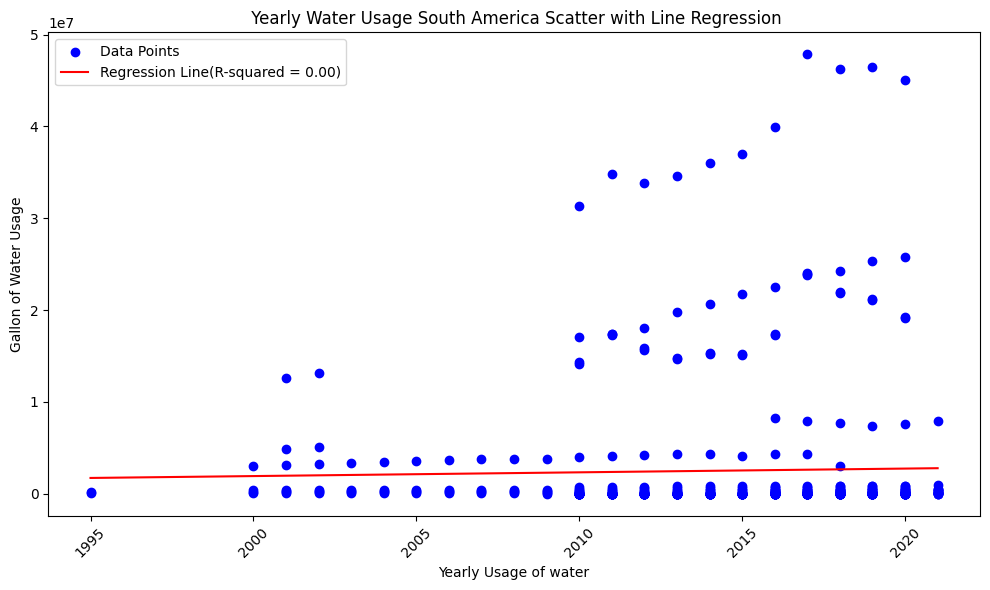

In [72]:
#filter data for Europe
South_America_df = South_America_df[h2o_csv['continent'] == 'South America']

#convert data frame columns to numpy arrays
x = np.array(South_America_df['year'])
y = np.array(South_America_df['h2o_gal'])

#create scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')

# calculate linerar regression params
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#create the regression line
regression_line = slope * x + intercept

#plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line(R-squared = {r_value**2:,.2f})')

#labels and title
plt.xlabel('Yearly Usage of water')
plt.ylabel('Gallon of Water Usage')
plt.title(' Yearly Water Usage South America Scatter with Line Regression')

#legend
plt.legend()

#display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()